In [33]:
import pandas as pd
import numpy as np

In [34]:
df=pd.read_csv(r"Iris.csv")

In [35]:
df.shape

(150, 5)

In [36]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:
#check distribution of target_class column
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [38]:
X=df.drop(['species'],axis=1)
y=df['species']

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=100)

In [40]:
X_train.shape,X_test.shape

((120, 4), (30, 4))

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with default hyperparameters:{0:0.2f}'.format(accuracy_score(y_test,y_pred)))

Model accuracy score with default hyperparameters:1.00


[[11  0  0]
 [ 0  6  0]
 [ 0  0 13]]


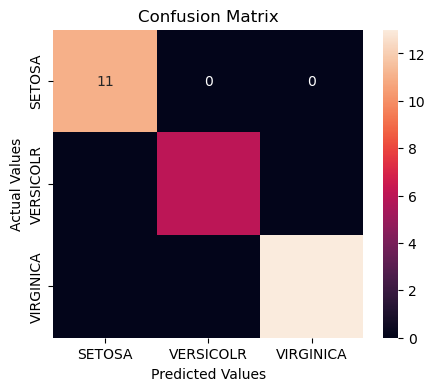

In [43]:
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)
cm_df=pd.DataFrame(cm,
index=['SETOSA','VERSICOLR','VIRGINICA'],
columns=['SETOSA','VERSICOLR','VIRGINICA'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df,annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [44]:
y_pred_train=svc.predict(X_train)
y_pred_train

array([1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 1, 2, 2,
       2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 2,
       2, 2, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1,
       2, 1, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 0, 0], dtype=int64)

In [45]:
print('Training-set accuracy score:{0:0.4f}'.format(accuracy_score(y_train,y_pred_train)))

Training-set accuracy score:0.9750


In [46]:
#one vs one
svc=SVC(decision_function_shape="ovo")
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with default hyperparameters:{0:0.2f}'.format(accuracy_score(y_test,y_pred)))

Model accuracy score with default hyperparameters:1.00


In [49]:
print ('Training-set accuracy score:{0:0.4f}'.format(accuracy_score(y_train,y_pred_train)))

Training-set accuracy score:0.9750
